In [ ]:
from google.colab import drive                          

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 

os.chdir("/content/drive/MyDrive/DSO530")

In [ ]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('final_option_train_formatted.csv')

In [ ]:
data.head()

,Value,S,K,tau,r,BS,BS_dummy,S_std,K_std,tau_std,r_std
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0,-1.232736,-0.778805,1.396842,-0.187526
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1,-1.844973,1.144491,-0.354382,1.841332
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0,-1.745757,-0.992504,0.640632,1.661787
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1,1.435988,0.930792,-1.389195,-0.923660
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0,0.772694,-1.206204,-0.354382,-1.103205


In [ ]:
data.shape

(1676, 11)

In [ ]:
data.describe(include='all')

,Value,S,K,tau,r,BS,BS_dummy,S_std,K_std,tau_std,r_std
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676,1676.000000,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Under,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,945,NaN,NaN,NaN,NaN,NaN
mean,15.086521,440.902829,438.221957,0.202000,0.030234,NaN,0.436158,3.847360e-16,-1.089555e-15,-3.285624e-16,2.670895e-16
std,14.041374,7.529351,23.404317,0.099733,0.000557,NaN,0.496055,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00
min,0.125000,425.472331,375.000000,0.003968,0.029510,NaN,0.000000,-2.049991e+00,-2.702101e+00,-1.986204e+00,-1.300705e+00
25%,2.246251,433.863864,420.000000,0.119048,0.029820,NaN,0.000000,-9.351491e-01,-7.788049e-01,-8.319880e-01,-7.441152e-01
50%,11.235294,442.579723,440.000000,0.202381,0.030130,NaN,0.000000,2.227809e-01,7.599340e-02,3.823317e-03,-1.875259e-01
75%,25.766604,447.320414,455.000000,0.285714,0.030540,NaN,1.000000,8.525969e-01,7.170921e-01,8.396346e-01,5.486084e-01


In [ ]:
#Import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

# Add New Variables

In [ ]:
#add new variables

data['Moneyness'] = data['S']/data['K']
data['days_to_expiration'] = data['tau']*365

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

data['Moneyness_std'] = stdsc.fit_transform(np.array(data['Moneyness']).reshape(-1,1))
data['days_to_expiration_std'] = stdsc.fit_transform(np.array(data['days_to_expiration']).reshape(-1,1))
data

,Value,S,K,tau,r,BS,BS_dummy,S_std,K_std,tau_std,r_std,Moneyness,days_to_expiration,Moneyness_std,days_to_expiration_std
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0,-1.232736,-0.778805,1.396842,-0.187526,1.027676,124.563492,0.357457,1.396842
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1,-1.844973,1.144491,-0.354382,1.841332,0.918313,60.833333,-1.712535,-0.354382
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0,-1.745757,-0.992504,0.640632,1.661787,1.030753,97.043651,0.415691,0.640632
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1,1.435988,0.930792,-1.389195,-0.923660,0.981982,23.174603,-0.507428,-1.389195
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0,0.772694,-1.206204,-0.354382,-1.103205,1.089558,60.833333,1.528752,-0.354382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1.470000,444.397163,475.0,0.273810,0.03034,Over,1,0.464234,1.571890,0.720233,0.189518,0.935573,99.940476,-1.385843,0.720233
1672,34.927317,438.453825,410.0,0.301587,0.02972,Under,0,-0.325358,-1.206204,0.998837,-0.923660,1.069400,110.079365,1.147190,0.998837
1673,41.127997,428.042219,390.0,0.170635,0.03188,Under,0,-1.708573,-2.061002,-0.314581,2.954511,1.097544,62.281746,1.679902,-0.314581
1674,0.440003,439.081203,480.0,0.293651,0.02962,Over,1,-0.242009,1.785590,0.919236,-1.103205,0.914753,107.182540,-1.779927,0.919236


In [ ]:
X = data.drop(columns=['Value','BS','BS_dummy','S','K','tau','r','Moneyness','days_to_expiration'])
y = data['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [ ]:
niter = 0
nitermax = 5
FDR3 = pd.DataFrame(np.zeros((nitermax,2)), columns=('trn', 'tst'))
FDR3

,trn,tst
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
results = pd.DataFrame(columns=['Model', 'In-Sample R2','Out-of-Sample R2','In-Sample RMSE','Out-of-Sample RMSE'])

In [ ]:
#Linear Regresion w/ new variables
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
nitermax = 5

for niter in range(nitermax):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
  model5 = lr.fit(X_train, y_train)
  y_pred_train = model5.predict(X_train)
  y_pred_test = model5.predict(X_test)

  in_sample_r2 = r2_score(y_train, y_pred_train)
  out_of_sample_r2 = r2_score(y_test, y_pred_test)

  in_sample_mse = mean_squared_error(y_train, y_pred_train)
  out_of_sample_mse = mean_squared_error(y_test, y_pred_test)

  in_sample_rmse = np.sqrt(in_sample_mse)
  out_of_sample_rmse = np.sqrt(out_of_sample_mse)

  model_output = pd.DataFrame({'Model': ['Linear Regression'], 'In-Sample R2': [in_sample_r2], 'Out-of-Sample R2': [out_of_sample_r2],'In-Sample RMSE': [in_sample_rmse],'Out-of-Sample RMSE': [out_of_sample_rmse]})
  results = pd.concat([results, model_output], ignore_index=True)

print(results)

               Model  In-Sample R2  Out-of-Sample R2  In-Sample RMSE  \
0  Linear Regression      0.982994          0.981497        1.849212   
1  Linear Regression      0.983478          0.980418        1.813871   
2  Linear Regression      0.983833          0.979601        1.770689   
3  Linear Regression      0.982886          0.982415        1.831672   
4  Linear Regression      0.982983          0.982033        1.840387   

   Out-of-Sample RMSE  
0            1.846588  
1            1.928342  
2            2.049435  
3            1.872913  
4            1.852693  


Text(0.5, 0, 'Random Forest Feature Importance')

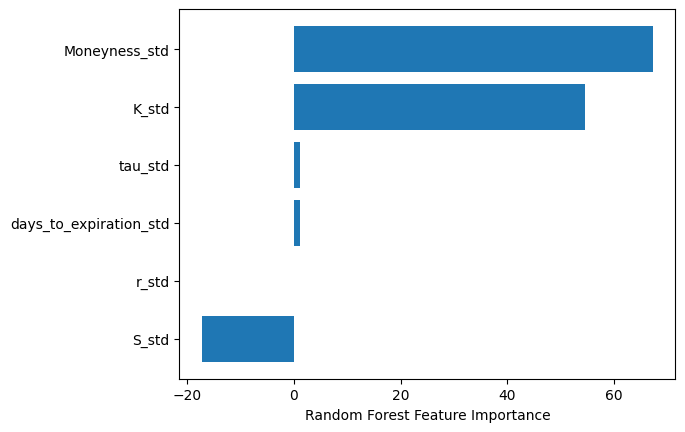

In [ ]:
## plot the coefficients
fig, axes = plt.subplots(nrows = 1,ncols = 1)
sorted_idx = model5.coef_.argsort()
plt.barh(X_train.columns[sorted_idx], model5.coef_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
#Best Subset Selection
import time
import itertools
import statsmodels.api as sm

def processSubset(feature_set):
# Fit model on feature_set and calculate RSS
  X1 = sm.add_constant(X[list(feature_set)])
  model = sm.OLS(y,X1)
  regr = model.fit()
  RSS = ((regr.predict(X1) - y) ** 2).sum()
  return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):
  tic = time.time()
  results = []
  for combo in itertools.combinations(X.columns, k):
    results.append(processSubset(combo))
# Wrap everything up in a nice dataframe
  models = pd.DataFrame(results)
# Choose the model with the smallest RSS
  best_model = models.loc[models['RSS'].idxmin()]
# idxmin() function returns index of first occurrence of minimum.
  toc = time.time()
  print("Processed ", models.shape[0], "models on", k, "predictors in",(toc-tic), "seconds.")
# Return the best model, along with some other useful information about the model
  return best_model

In [ ]:
models = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
for i in range(0,7):
  models.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


Processed  1 models on 0 predictors in 0.01714301109313965 seconds.
Processed  6 models on 1 predictors in 0.017905473709106445 seconds.
Processed  15 models on 2 predictors in 0.04613089561462402 seconds.
Processed  20 models on 3 predictors in 0.07088375091552734 seconds.
Processed  15 models on 4 predictors in 0.05170249938964844 seconds.
Processed  6 models on 5 predictors in 0.035698890686035156 seconds.
Processed  1 models on 6 predictors in 0.006699323654174805 seconds.
Total elapsed time: 0.2727088928222656 seconds.


In [ ]:
models

,RSS,model
0,330243.293315,<statsmodels.regression.linear_model.Regressio...
1,35113.308853,<statsmodels.regression.linear_model.Regressio...
2,20556.671678,<statsmodels.regression.linear_model.Regressio...
3,13957.695732,<statsmodels.regression.linear_model.Regressio...
4,5688.781482,<statsmodels.regression.linear_model.Regressio...
5,5683.198549,<statsmodels.regression.linear_model.Regressio...
6,5683.198549,<statsmodels.regression.linear_model.Regressio...


In [ ]:
#R2 for each model 
print(models.loc[0, "model"].rsquared)
print(models.loc[1, "model"].rsquared)
print(models.loc[2, "model"].rsquared)
print(models.loc[3, "model"].rsquared)
print(models.loc[4, "model"].rsquared)
print(models.loc[5, "model"].rsquared)
print(models.loc[6, "model"].rsquared)

2.220446049250313e-16
0.8936744225723688
0.9377529473144826
0.9577351122204161
0.982773968170829
0.9827908736859382
0.9827908736859382


In [ ]:
#ideal number of predictors is 4
#removes r and tau
print(getBest(4)["model"].summary())


Processed  15 models on 4 predictors in 0.05822563171386719 seconds.
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.383e+04
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        20:49:47   Log-Likelihood:                -3402.2
No. Observations:                1676   AIC:                             6814.
Df Residuals:                    1671   BIC:                             6842.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

Text(0, 0.5, 'BIC')

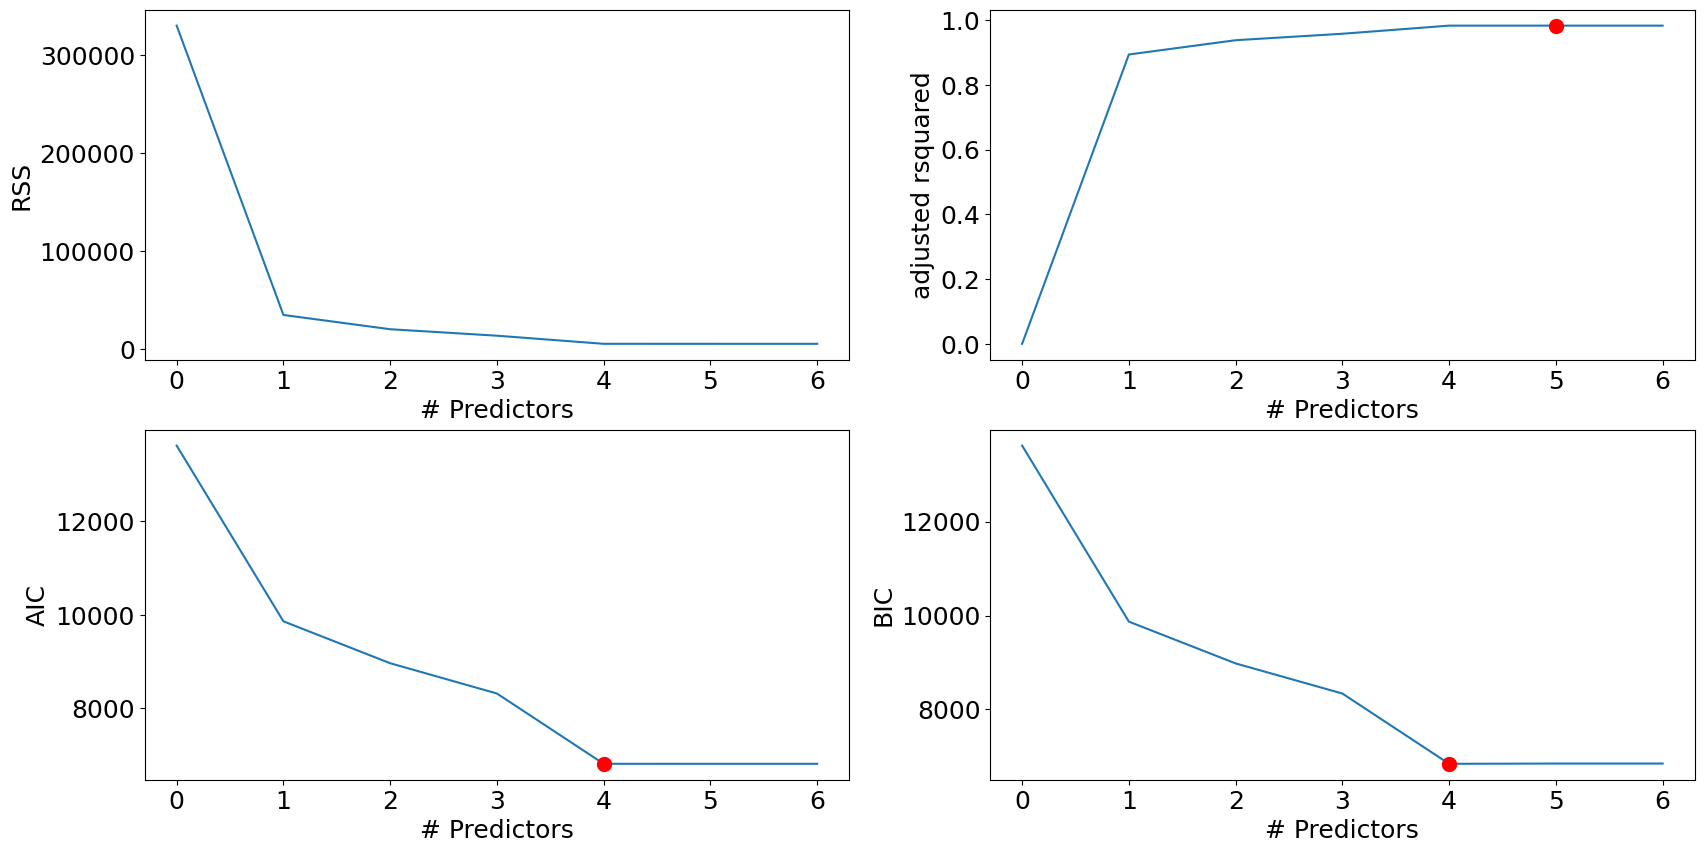

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)
# We will now plot a curve to show the relationship between the number of␣predictors and the RSS
plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The idxmax() function can be used to identify the location of the maximum point of a vector
rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')
# We'll do the same for AIC and BIC, this time looking for the models with the␣SMALLEST statistic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')


In [ ]:
#resplit removing r and tau and only keeping 4 best subset variables
X = data.drop(columns=['Value','BS','BS_dummy','S','K','tau','r','Moneyness','days_to_expiration','tau_std','r_std'])
y = data['Value']


In [ ]:
results = pd.DataFrame(columns=['Model', 'In-Sample R2','Out-of-Sample R2','Train RMSE','Test RMSE'])

In [ ]:
results

,Model,In-Sample R2,Out-of-Sample R2,Train RMSE,Test RMSE


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state =0)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  model5 = lr.fit(X_train, y_train)
  y_pred_train = model5.predict(X_train)
  y_pred_test = model5.predict(X_test)

  in_sample_r2 = r2_score(y_train, y_pred_train)
  out_of_sample_r2 = r2_score(y_test, y_pred_test)

  in_sample_mse = mean_squared_error(y_train, y_pred_train)
  out_of_sample_mse = mean_squared_error(y_test, y_pred_test)

  in_sample_rmse = np.sqrt(in_sample_mse)
  out_of_sample_rmse = np.sqrt(out_of_sample_mse)

  model_output = pd.DataFrame({'Model': ['Linear Regression'], 'In-Sample R2': [in_sample_r2], 'Out-of-Sample R2': [out_of_sample_r2],'Train RMSE': [in_sample_rmse],'Test RMSE': [out_of_sample_rmse]})
  results = pd.concat([results, model_output], ignore_index=True)

print(results)

               Model  In-Sample R2  Out-of-Sample R2  Train RMSE  Test RMSE
0  Linear Regression      0.982629          0.984134    1.871812   1.559333
1  Linear Regression      0.983276          0.978265    1.809643   2.119319
2  Linear Regression      0.982620          0.984037    1.855812   1.722369
3  Linear Regression      0.982814          0.982304    1.848431   1.790622
4  Linear Regression      0.982743          0.982681    1.824797   1.996304
5  Linear Regression      0.983215          0.978708    1.815307   2.078513
6  Linear Regression      0.982446          0.985717    1.862712   1.653079
7  Linear Regression      0.982772          0.982768    1.843902   1.829185
8  Linear Regression      0.982755          0.982737    1.840591   1.869136
9  Linear Regression      0.982568          0.984346    1.844098   1.828877


In [ ]:
#Linear Regresion w/ best subset
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

model5 = lr.fit(X_train, y_train)
print(model5.coef_); print(model5.intercept_)

#predict y values
y_pred_train = model5.predict(X_train)
y_pred_test = model5.predict(X_test)

in_sample_r2 = r2_score(y_train, y_pred_train); print('In Sample R2:',in_sample_r2)
out_of_sample_r2 = r2_score(y_test, y_pred_test); print('Out of Sample R2',out_of_sample_r2)

in_sample_mse = mean_squared_error(y_train, y_pred_train)
out_of_sample_mse = mean_squared_error(y_test, y_pred_test)
in_sample_rmse = np.sqrt(in_sample_mse);print('In Sample RMSE',in_sample_rmse)
out_of_sample_rmse = np.sqrt(out_of_sample_mse);print('Out of Sample RMSE',out_of_sample_rmse)

[-16.95769975  53.76302921  66.4078317    2.30119494]
15.076633325718575
In Sample R2: 0.9825678469767463
Out of Sample R2 0.9843459271455792
In Sample RMSE 1.844098171990654
Out of Sample RMSE 1.8288774544900848


Text(0.5, 0, 'Linear Regression Feature Importance')

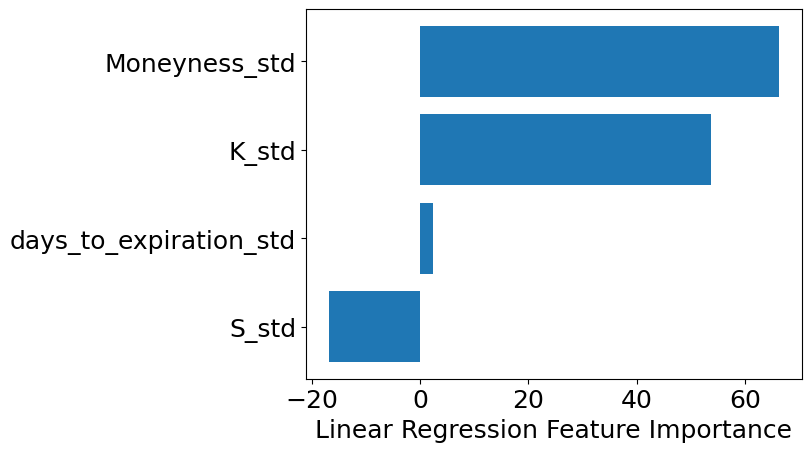

In [ ]:
## plot the coefficients
fig, axes = plt.subplots(nrows = 1,ncols = 1)
sorted_idx = model5.coef_.argsort()
plt.barh(X_train.columns[sorted_idx], model5.coef_[sorted_idx])
plt.xlabel("Linear Regression Feature Importance")

In [ ]:
#calculate optimal ccp_alpha
reg_tree = DecisionTreeRegressor(random_state=0)
path = reg_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=1)

param_grid = {'ccp_alpha': ccp_alphas}
reg = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(reg, param_grid=param_grid, cv=kfolds, scoring='r2')
grid_search.fit(X_train, y_train)

best_ccp_alpha = grid_search.best_params_['ccp_alpha']

In [ ]:
best_ccp_alpha

2.439881234957097e-05

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=0)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    reg_tree_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.1)
    reg_tree_final.fit(X_train, y_train)

    y_pred_test = reg_tree_final.predict(X_test)
    y_pred_train = reg_tree_final.predict(X_train)

    score_test = r2_score(y_test, y_pred_test)
    score_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)

    rmse_test = np.sqrt(mse_test)
    rmse_train = np.sqrt(mse_train)

    model_output = pd.DataFrame({'Model': ['Decision Tree'], 'In-Sample R2': [score_train], 'Out-of-Sample R2': [score_test], 'Train RMSE': [rmse_train], 'Test RMSE': [rmse_test]})
    results = pd.concat([results, model_output], ignore_index=True)

print(results)


                Model  In-Sample R2  Out-of-Sample R2  Train RMSE  Test RMSE
0   Linear Regression      0.982629          0.984134    1.871812   1.559333
1   Linear Regression      0.983276          0.978265    1.809643   2.119319
2   Linear Regression      0.982620          0.984037    1.855812   1.722369
3   Linear Regression      0.982814          0.982304    1.848431   1.790622
4   Linear Regression      0.982743          0.982681    1.824797   1.996304
5   Linear Regression      0.983215          0.978708    1.815307   2.078513
6   Linear Regression      0.982446          0.985717    1.862712   1.653079
7   Linear Regression      0.982772          0.982768    1.843902   1.829185
8   Linear Regression      0.982755          0.982737    1.840591   1.869136
9   Linear Regression      0.982568          0.984346    1.844098   1.828877
10      Decision Tree      0.988589          0.974921    1.517101   1.960507
11      Decision Tree      0.987572          0.980677    1.560008   1.998255

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=0)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  reg_rf = RandomForestRegressor(random_state=1, n_estimators = 200, ccp_alpha=0.1)
  reg_rf.fit(X_train, y_train)
  y_pred_rf = reg_rf.predict(X_test)
  y_pred_rf_train = reg_rf.predict(X_train)
  score_test_rf = r2_score(y_test, y_pred_rf)
  score_test_r2_insample = r2_score(y_train,y_pred_rf_train)

  in_sample_mse = mean_squared_error(y_train, y_pred_rf_train)
  out_of_sample_mse = mean_squared_error(y_test, y_pred_rf)

  in_sample_rmse = np.sqrt(in_sample_mse)
  out_of_sample_rmse = np.sqrt(out_of_sample_mse)

  model_output = pd.DataFrame({'Model': ['Random Forest'], 'In-Sample R2': [score_test_r2_insample], 'Out-of-Sample R2': [score_test_rf],'Train RMSE': [in_sample_rmse],'Test RMSE': [out_of_sample_rmse]})
  results = pd.concat([results, model_output], ignore_index=True)

print(results)

                Model  In-Sample R2  Out-of-Sample R2  Train RMSE  Test RMSE
0   Linear Regression      0.982629          0.984134    1.871812   1.559333
1   Linear Regression      0.983276          0.978265    1.809643   2.119319
2   Linear Regression      0.982620          0.984037    1.855812   1.722369
3   Linear Regression      0.982814          0.982304    1.848431   1.790622
4   Linear Regression      0.982743          0.982681    1.824797   1.996304
5   Linear Regression      0.983215          0.978708    1.815307   2.078513
6   Linear Regression      0.982446          0.985717    1.862712   1.653079
7   Linear Regression      0.982772          0.982768    1.843902   1.829185
8   Linear Regression      0.982755          0.982737    1.840591   1.869136
9   Linear Regression      0.982568          0.984346    1.844098   1.828877
10      Decision Tree      0.988589          0.974921    1.517101   1.960507
11      Decision Tree      0.987572          0.980677    1.560008   1.998255

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

#Decision Tree with best subset
#get highest value with no alpha
#can't get code to work to get optimal alpha from pruning
reg_tree_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.1)
reg_tree_final.fit(X_train, y_train)
# Evaluate on the (X_test,y_test)
y_pred_test = reg_tree_final.predict(X_test)
y_pred_train = reg_tree_final.predict(X_train)
score_test = r2_score(y_test, y_pred_test)
score_test_r2_insample = r2_score(y_train,y_pred_train)
print('In Sample R2',score_test_r2_insample)
print('Out of Sample R2',score_test)

in_sample_mse = mean_squared_error(y_train, y_pred_train)
out_of_sample_mse = mean_squared_error(y_test, y_pred_test)
in_sample_rmse = np.sqrt(in_sample_mse);print('In Sample RMSE',in_sample_rmse)
out_of_sample_rmse = np.sqrt(out_of_sample_mse);print('Out of Sample RMSE',out_of_sample_rmse)

In Sample R2 0.9882880883560805
Out of Sample R2 0.9844799596535834
In Sample RMSE 1.5115496470906453
Out of Sample RMSE 1.821031062034018


In [ ]:
#Random Forest (final model)
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(random_state=1, n_estimators = 200, ccp_alpha=0.1)
reg_rf.fit(X_train, y_train)
y_pred_rf = reg_rf.predict(X_test)
y_pred_rf_train = reg_rf.predict(X_train)
score_test_rf = r2_score(y_test, y_pred_rf)
score_test_r2_insample = r2_score(y_train,y_pred_rf_train)
print('In Sample R2:',score_test_r2_insample)
print('Out of Sample R2:',score_test_rf)


in_sample_mse = mean_squared_error(y_train, y_pred_rf_train)
out_of_sample_mse = mean_squared_error(y_test, y_pred_rf)
in_sample_rmse = np.sqrt(in_sample_mse);print('In Sample RMSE',in_sample_rmse)
out_of_sample_rmse = np.sqrt(out_of_sample_mse);print('Out of Sample RMSE',out_of_sample_rmse)

In Sample R2: 0.9943750259000353
Out of Sample R2: 0.9924266449257575
In Sample RMSE 1.0475355877143133
Out of Sample RMSE 1.2720819501141358


In [ ]:
reg_rf.feature_importances_

array([0.00000000e+00, 1.06548063e-04, 9.81646327e-01, 1.82471245e-02])

Text(0.5, 0, 'Random Forest Feature Importance')

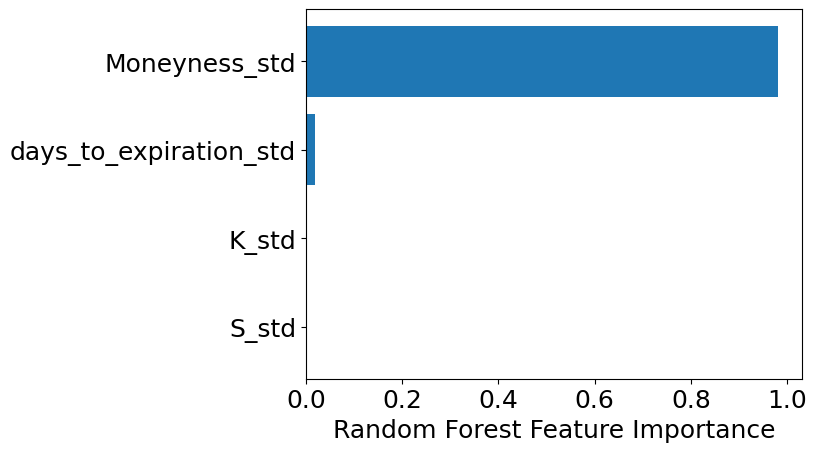

In [ ]:
## plot the top features
fig, axes = plt.subplots(nrows = 1,ncols = 1)
sorted_idx = reg_rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], reg_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
df_unpivot = results.melt( id_vars='Model', value_vars=['In-Sample R2','Out-of-Sample R2'], var_name=['Type'], value_name='Value')
df_unpivot.head()

,Model,Type,Value
0,Linear Regression,In-Sample R2,0.982629
1,Linear Regression,In-Sample R2,0.983276
2,Linear Regression,In-Sample R2,0.982620
3,Linear Regression,In-Sample R2,0.982814
4,Linear Regression,In-Sample R2,0.982743


In [ ]:
df_compare = df_unpivot[(df_unpivot['Type']=='In-Sample R2') | (df_unpivot['Type']=='Out-of-Sample R2') ]
df_compare.head()

,Model,Type,Value
0,Linear Regression,In-Sample R2,0.982629
1,Linear Regression,In-Sample R2,0.983276
2,Linear Regression,In-Sample R2,0.982620
3,Linear Regression,In-Sample R2,0.982814
4,Linear Regression,In-Sample R2,0.982743


In [ ]:
#model output

output = results.groupby('Model').agg({'In-Sample R2':['mean','std'],'Out-of-Sample R2':['mean','std']})
output

In-Sample R2           Out-of-Sample R2          
                          mean       std             mean       std
Model                                                              
Decision Tree         0.988397  0.000609         0.983558  0.003532
Linear Regression     0.982784  0.000267         0.982570  0.002387
Random Forest         0.994376  0.000174         0.992141  0.002283

<ipython-input-42-e901c4d07e78>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(.95,1,.1)


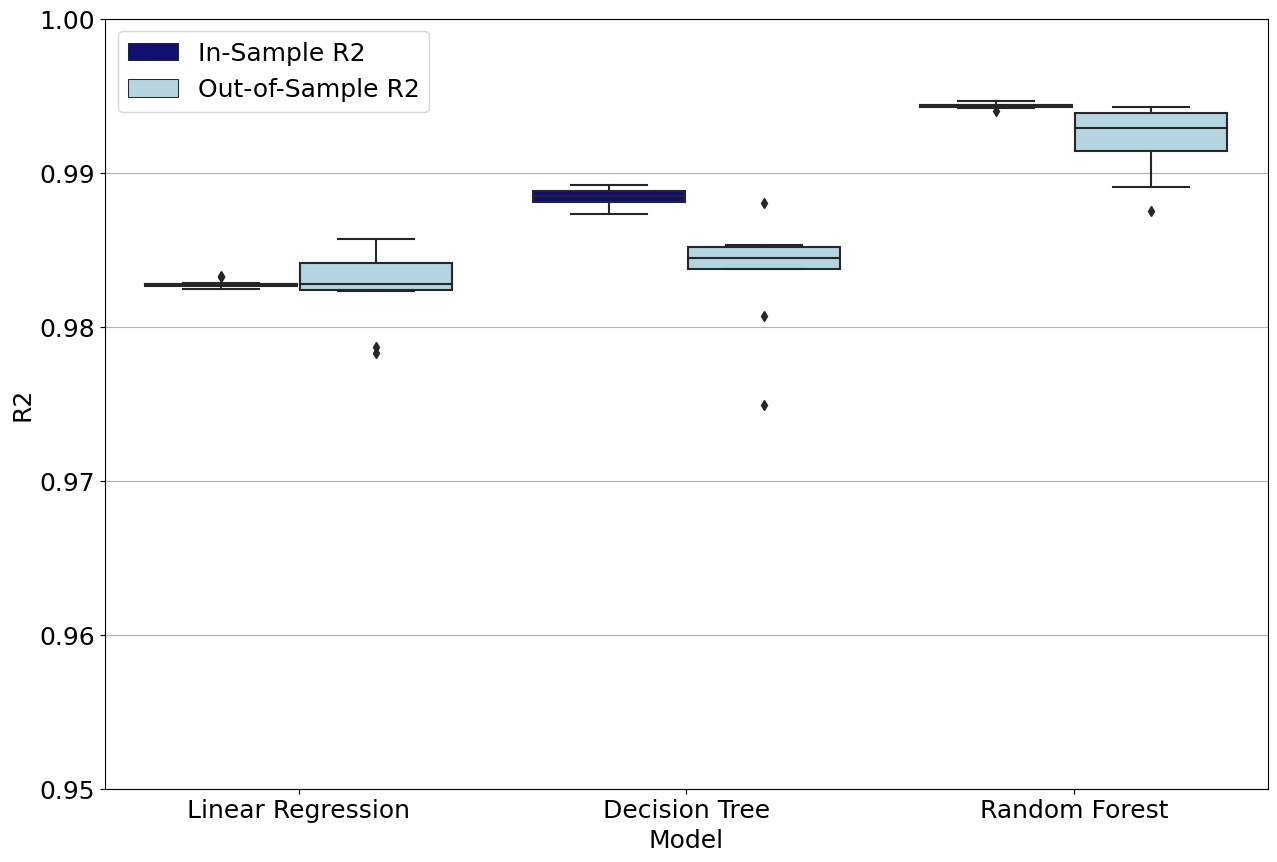

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Model',y='Value',hue='Type', data=df_compare, palette=['navy','lightblue'])

plt.ylim(.95,1,.1)

plt.legend(loc='upper left')
plt.ylabel('R2')
plt.grid(axis='y')
plt.savefig('modeling.png')
plt.show()

In [ ]:
df_unpivot_rmse = results.melt( id_vars='Model', value_vars=['Train RMSE','Test RMSE'], var_name=['Type'], value_name='Value')
df_unpivot_rmse.head()

,Model,Type,Value
0,Linear Regression,Train RMSE,1.871812
1,Linear Regression,Train RMSE,1.809643
2,Linear Regression,Train RMSE,1.855812
3,Linear Regression,Train RMSE,1.848431
4,Linear Regression,Train RMSE,1.824797


In [ ]:
df_compare_rmse = df_unpivot_rmse[(df_unpivot_rmse['Type']=='Train RMSE') | (df_unpivot_rmse['Type']=='Test RMSE') ]
df_compare_rmse.head()

,Model,Type,Value
0,Linear Regression,Train RMSE,1.871812
1,Linear Regression,Train RMSE,1.809643
2,Linear Regression,Train RMSE,1.855812
3,Linear Regression,Train RMSE,1.848431
4,Linear Regression,Train RMSE,1.824797


In [ ]:
#model output

output = results.groupby('Model').agg({'Train RMSE':['mean','std'],'Test RMSE':['mean','std']})
output

#Decision Tree RMSE ratio 0.854
#Linear Regression RMSE ratio 0.99600118
#Random Forest RMSE ratio 0.84874

Train RMSE           Test RMSE          
                        mean       std      mean       std
Model                                                     
Decision Tree       1.511465  0.036811  1.778701  0.122193
Linear Regression   1.841710  0.020040  1.844674  0.179567
Random Forest       1.052559  0.018109  1.226626  0.164111

<ipython-input-46-8d8e5a9e0e7e>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,2,.1)


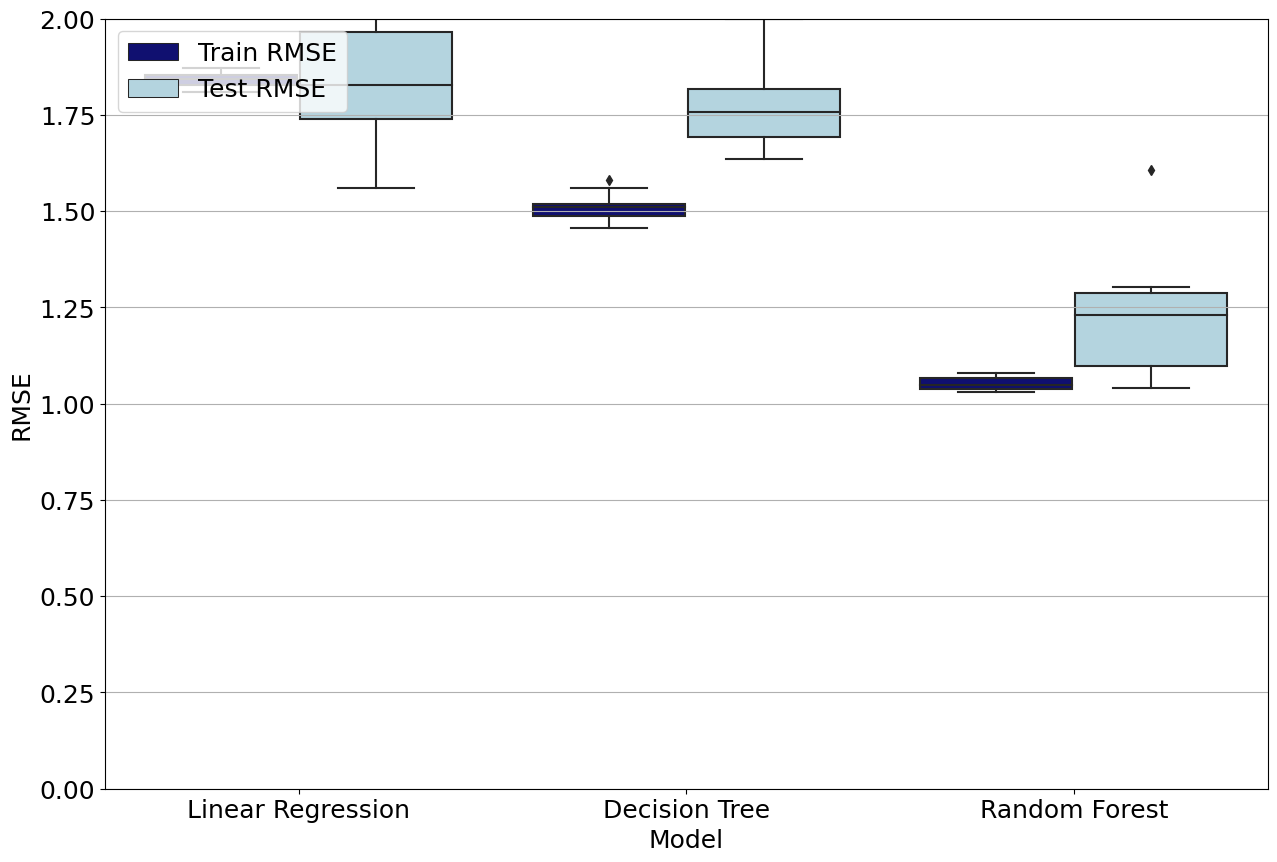

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Model',y='Value',hue='Type', data=df_compare_rmse, palette=['navy','lightblue'])

plt.ylim(0,2,.1)

plt.legend(loc='upper left')
plt.ylabel('RMSE')
plt.grid(axis='y')
plt.savefig('modeling.png')
plt.show()

In [ ]:
#Get Prediction
test_data = pd.read_csv('option_test_wolabel_2.csv')

In [ ]:
test_data

,S,K,tau,r,Moneyness,days_to_expiration,S_std,K_std,tau_std,r_std,Moneyness_std,days_to_expiration_std
0,431.618600,460,0.293651,0.03147,0.938301,107.182540,-1.244577,0.824029,0.872239,2.301632,-1.238708,0.872239
1,432.633296,420,0.182540,0.03147,1.030079,66.626984,-1.111534,-0.858199,-0.203862,2.301632,0.483070,-0.203862
2,432.633296,430,0.182540,0.03147,1.006124,66.626984,-1.111534,-0.437642,-0.203862,2.301632,0.033662,-0.203862
3,431.618600,415,0.293651,0.03147,1.040045,107.182540,-1.244577,-1.068477,0.872239,2.301632,0.670026,0.872239
4,434.772855,420,0.043651,0.03147,1.035173,15.932540,-0.831002,-0.858199,-1.548988,2.301632,0.578638,-1.548988
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,440.067417,435,0.182540,0.02962,1.011649,66.626984,-0.136798,-0.227364,-0.203862,-1.111854,0.137318,-0.203862
1116,439.081203,485,0.293651,0.02962,0.905322,107.182540,-0.266107,1.875421,0.872239,-1.111854,-1.857407,0.872239
1117,439.081203,475,0.293651,0.02962,0.924381,107.182540,-0.266107,1.454864,0.872239,-1.111854,-1.499847,0.872239
1118,442.490015,420,0.043651,0.02962,1.053548,15.932540,0.180844,-0.858199,-1.548988,-1.111854,0.923343,-1.548988


In [ ]:
X = test_data.drop(columns=['S','K','tau','r','Moneyness', 'days_to_expiration', 'tau_std','r_std'])
X

,S_std,K_std,Moneyness_std,days_to_expiration_std
0,-1.244577,0.824029,-1.238708,0.872239
1,-1.111534,-0.858199,0.483070,-0.203862
2,-1.111534,-0.437642,0.033662,-0.203862
3,-1.244577,-1.068477,0.670026,0.872239
4,-0.831002,-0.858199,0.578638,-1.548988
...,...,...,...,...
1115,-0.136798,-0.227364,0.137318,-0.203862
1116,-0.266107,1.875421,-1.857407,0.872239
1117,-0.266107,1.454864,-1.499847,0.872239
1118,0.180844,-0.858199,0.923343,-1.548988


In [ ]:
prediction_y_pred_rf = reg_rf.predict(X)

In [ ]:
prediction_y_pred_rf

array([ 0.86966989, 20.22051097, 10.88737927, ...,  0.73302766,
       27.09409501, 17.17050665])

In [ ]:
print(prediction_y_pred_rf)

[ 0.86966989 20.22051097 10.88737927 ...  0.73302766 27.09409501
 17.17050665]


In [ ]:
# Create a DataFrame with column name "BS"
df = pd.DataFrame({'Value': prediction_y_pred_rf})

# Print the DataFrame
df

,Value
0,0.869670
1,20.220511
2,10.887379
3,25.813605
4,19.115272
...,...
1115,13.591592
1116,0.733028
1117,0.733028
1118,27.094095


In [ ]:
df.to_csv("Final Value Prediction.csv", index=False)